In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#隨機森林/決策樹
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
#分割訓練資料與測試資料
from sklearn.model_selection import train_test_split
#預測結果報告
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [2]:
#將原始資料以股票代碼與時間合併
x_data = pd.read_csv("x_data.csv")
y_data = pd.read_csv("y_data.csv")
data=pd.merge(x_data,y_data,on=["stock_id","year"])
data

,stock_id,year,營業毛利率,營業利益率,ROA(A)稅後息前,ROE(A)－稅後,流動比率,負債比率,總資產週轉次數,應收帳款週轉次數,季底每股稅後淨利,每股淨值(C),當季季底P/E,當季季底P/B,當季季底PSR,60日均價(元),本季以來報酬率 %,class
0,1101,201703,14.16,9.17,0.60,0.79,137.38,43.15,0.08,1.07,0.20,29.19,9.7,1.24,1.44,24.1262,3.2718,1
1,1102,201703,7.19,3.41,0.24,0.1,89.29,42.95,0.05,0.91,0.07,36.06,17.38,0.85,1.72,23.7786,16.1295,1
2,1103,201703,22.15,4.06,-0.32,-0.66,540.81,35.03,0.02,1.92,-0.17,23.29,191.28,0.57,2.68,8.7599,26.5749,1
3,1104,201703,12.63,4.33,1.39,1.7,144.18,19.31,0.05,1.11,0.43,25.64,9.84,1.04,3.67,20.125,8.3166,1
4,1108,201703,9.03,3.15,0.33,0.39,237.08,36.77,0.12,1.22,0.05,11.8,13.9,0.84,0.97,8.9379,9.1007,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18197,9944,202112,14.37,-9.62,8.50,15.14,207.23,42.16,0.11,1.46,4.37,30.24,3.26,0.82,1,22.7175,16.4648,1
18198,9945,202112,20.75,11.46,1.17,1.77,200.33,35.81,0.04,2.84,0.82,55.66,7.42,1.15,4.92,63.8117,11.1500,1
18199,9946,202112,25.32,10.26,0.51,1.1,208.27,57.24,0.04,7.03,0.22,20.04,22.92,0.75,2.87,15.1808,-2.2655,0
18200,9955,202112,-1.98,-8.29,-1.05,-2.22,98.50,47.86,0.14,9.58,-0.32,14.46,.,1.19,1.2,17,2.6785,1


In [3]:
data = data.replace(["."], float("nan") )
#處理遺漏值
data=data.dropna(axis=0)
data

,stock_id,year,營業毛利率,營業利益率,ROA(A)稅後息前,ROE(A)－稅後,流動比率,負債比率,總資產週轉次數,應收帳款週轉次數,季底每股稅後淨利,每股淨值(C),當季季底P/E,當季季底P/B,當季季底PSR,60日均價(元),本季以來報酬率 %,class
0,1101,201703,14.16,9.17,0.60,0.79,137.38,43.15,0.08,1.07,0.20,29.19,9.7,1.24,1.44,24.1262,3.2718,1
1,1102,201703,7.19,3.41,0.24,0.1,89.29,42.95,0.05,0.91,0.07,36.06,17.38,0.85,1.72,23.7786,16.1295,1
2,1103,201703,22.15,4.06,-0.32,-0.66,540.81,35.03,0.02,1.92,-0.17,23.29,191.28,0.57,2.68,8.7599,26.5749,1
3,1104,201703,12.63,4.33,1.39,1.7,144.18,19.31,0.05,1.11,0.43,25.64,9.84,1.04,3.67,20.125,8.3166,1
4,1108,201703,9.03,3.15,0.33,0.39,237.08,36.77,0.12,1.22,0.05,11.8,13.9,0.84,0.97,8.9379,9.1007,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18196,9943,202112,55.64,22.58,3.78,5.97,153.05,34.59,0.11,25.84,1.39,23.91,122.5,2.53,5.29,61.2483,-2.1068,0
18197,9944,202112,14.37,-9.62,8.50,15.14,207.23,42.16,0.11,1.46,4.37,30.24,3.26,0.82,1,22.7175,16.4648,1
18198,9945,202112,20.75,11.46,1.17,1.77,200.33,35.81,0.04,2.84,0.82,55.66,7.42,1.15,4.92,63.8117,11.1500,1
18199,9946,202112,25.32,10.26,0.51,1.1,208.27,57.24,0.04,7.03,0.22,20.04,22.92,0.75,2.87,15.1808,-2.2655,0


In [4]:
#分類 >> 1:報酬率為正; 0:報酬率為負
dy = data.iloc[:,[17]]

#特徵類組1
dx_1 = data.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14]]
dx_1
#features = ["營業毛利率","營業利益率","ROA(A)稅後息前","ROE(A)－稅後","流動比率","負債比率","總資產週轉次數",
#"應收帳款週轉次數","季底每股稅後淨利","每股淨值(C)","當季季底P/E","當季季底P/B","當季季底PSR"]

,營業毛利率,營業利益率,ROA(A)稅後息前,ROE(A)－稅後,流動比率,負債比率,總資產週轉次數,應收帳款週轉次數,季底每股稅後淨利,每股淨值(C),當季季底P/E,當季季底P/B,當季季底PSR
0,14.16,9.17,0.60,0.79,137.38,43.15,0.08,1.07,0.20,29.19,9.7,1.24,1.44
1,7.19,3.41,0.24,0.1,89.29,42.95,0.05,0.91,0.07,36.06,17.38,0.85,1.72
2,22.15,4.06,-0.32,-0.66,540.81,35.03,0.02,1.92,-0.17,23.29,191.28,0.57,2.68
3,12.63,4.33,1.39,1.7,144.18,19.31,0.05,1.11,0.43,25.64,9.84,1.04,3.67
4,9.03,3.15,0.33,0.39,237.08,36.77,0.12,1.22,0.05,11.8,13.9,0.84,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18196,55.64,22.58,3.78,5.97,153.05,34.59,0.11,25.84,1.39,23.91,122.5,2.53,5.29
18197,14.37,-9.62,8.50,15.14,207.23,42.16,0.11,1.46,4.37,30.24,3.26,0.82,1
18198,20.75,11.46,1.17,1.77,200.33,35.81,0.04,2.84,0.82,55.66,7.42,1.15,4.92
18199,25.32,10.26,0.51,1.1,208.27,57.24,0.04,7.03,0.22,20.04,22.92,0.75,2.87


In [5]:
#訓練資料與測試資料分集
dx1_train,dx1_test,dy_train,dy_test = train_test_split(dx_1,dy,test_size=0.2,random_state=80)
print(dx1_train.shape)
print(dx1_test.shape)

(11539, 13)
(2885, 13)


In [6]:
#將dataframe型態轉為一維array
dy_train=dy_train.values
dy_train=dy_train.reshape((1,11539))
dy_train=dy_train.flatten()
dy_train
dy_test=dy_test.values
dy_test=dy_test.reshape((1,2885))
dy_test=dy_test.flatten()
dy_test

array([0, 1, 1, ..., 0, 1, 0])

In [7]:
#建構森林
forest = RandomForestClassifier(criterion ="entropy",n_estimators=250)
forest.fit(dx1_train,dy_train)

RandomForestClassifier(criterion='entropy', n_estimators=250)

In [8]:
predictions = forest.predict(dx1_test)

In [9]:
print(classification_report(dy_test,predictions))
print(forest.score(dx1_train,dy_train))
print(forest.score(dx1_test,dy_test))

              precision    recall  f1-score   support

           0       0.52      0.34      0.41      1169
           1       0.64      0.78      0.70      1716

    accuracy                           0.60      2885
   macro avg       0.58      0.56      0.56      2885
weighted avg       0.59      0.60      0.58      2885

1.0
0.6038128249566724


In [10]:
#挑選重要特徵
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
feat_labels = ["營業毛利率","營業利益率","ROA(A)稅後息前","ROE(A)－稅後","流動比率","負債比率",
               "總資產週轉次數","應收帳款週轉次數","季底每股稅後淨利","每股淨值(C)","當季季底P/E",
               "當季季底P/B","當季季底PSR"]
for f in range(dx1_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) 當季季底P/E                        0.086819
 2) 營業毛利率                          0.081368
 3) 營業利益率                          0.080690
 4) ROE(A)－稅後                      0.080125
 5) 流動比率                           0.079566
 6) 當季季底P/B                        0.078229
 7) 負債比率                           0.077725
 8) 每股淨值(C)                        0.077670
 9) 應收帳款週轉次數                       0.077352
10) ROA(A)稅後息前                     0.076513
11) 當季季底PSR                        0.074784
12) 季底每股稅後淨利                       0.071563
13) 總資產週轉次數                        0.057597


In [10]:
cv_scores=[]
test_scores=[]
x=(np.arange(20)+1)*50
x_str=[str(n)for n in x]
for t in x:
    FR = RandomForestClassifier(n_estimators=t,random_state=1)
    FR.fit(dx1_train,dy_train)
    cv_scores.append(cross_val_score(FR,dx1_train,dy_train,cv=5).mean())
    test_scores.append(FR.score(dx1_test,dy_test))

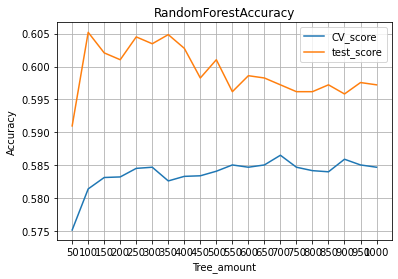

In [11]:
plt.title("RandomForestAccuracy")
plt.plot(x_str,cv_scores,label="CV_score")
plt.plot(x_str,test_scores,label="test_score")
plt.xlabel("Tree_amount")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
#建立決策樹
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth=4, random_state=33)
DT.fit(dx1_train, dy_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=33)

In [12]:
prediction=DT.predict(dx1_test)

In [13]:
print(export_text(DT, feature_names=list(dx1_test)))

|--- ROE(A)－稅後 <= 2.12
|   |--- 當季季底PSR <= 1.75
|   |   |--- ROA(A)稅後息前 <= 0.20
|   |   |   |--- 當季季底P/B <= 0.62
|   |   |   |   |--- class: 0
|   |   |   |--- 當季季底P/B >  0.62
|   |   |   |   |--- class: 0
|   |   |--- ROA(A)稅後息前 >  0.20
|   |   |   |--- 當季季底P/E <= 9.36
|   |   |   |   |--- class: 0
|   |   |   |--- 當季季底P/E >  9.36
|   |   |   |   |--- class: 1
|   |--- 當季季底PSR >  1.75
|   |   |--- 營業毛利率 <= 31.61
|   |   |   |--- 負債比率 <= 8.01
|   |   |   |   |--- class: 1
|   |   |   |--- 負債比率 >  8.01
|   |   |   |   |--- class: 1
|   |   |--- 營業毛利率 >  31.61
|   |   |   |--- 季底每股稅後淨利 <= 0.38
|   |   |   |   |--- class: 0
|   |   |   |--- 季底每股稅後淨利 >  0.38
|   |   |   |   |--- class: 1
|--- ROE(A)－稅後 >  2.12
|   |--- 當季季底P/E <= 11.65
|   |   |--- 總資產週轉次數 <= 0.55
|   |   |   |--- 每股淨值(C) <= 76.32
|   |   |   |   |--- class: 1
|   |   |   |--- 每股淨值(C) >  76.32
|   |   |   |   |--- class: 0
|   |   |--- 總資產週轉次數 >  0.55
|   |   |   |--- 負債比率 <= 38.78
|   |   |   |   |--- class: 0
|   |   |  

In [34]:
#特徵類組2
dx_2 = data.iloc[:,[2,3,4,6,12]]
dx_2
#features = ["營業毛利率","營業利益率","ROA(A)稅後息前","ROE(A)－稅後","流動比率","負債比率","總資產週轉次數",
#"應收帳款週轉次數","季底每股稅後淨利","每股淨值(C)","當季季底P/E","當季季底P/B","當季季底PSR"]

,營業毛利率,營業利益率,ROA(A)稅後息前,流動比率,當季季底P/E
0,14.16,9.17,0.60,137.38,9.7
1,7.19,3.41,0.24,89.29,17.38
2,22.15,4.06,-0.32,540.81,191.28
3,12.63,4.33,1.39,144.18,9.84
4,9.03,3.15,0.33,237.08,13.9
...,...,...,...,...,...
18196,55.64,22.58,3.78,153.05,122.5
18197,14.37,-9.62,8.50,207.23,3.26
18198,20.75,11.46,1.17,200.33,7.42
18199,25.32,10.26,0.51,208.27,22.92


In [35]:
#訓練資料與測試資料分集
dx2_train,dx2_test,dy_train,dy_test = train_test_split(dx_2,dy,test_size=0.2,random_state=98)
print(dx2_train.shape)
print(dx2_test.shape)
#將dataframe型態轉為一維array
dy_train=dy_train.values
dy_train=dy_train.reshape((1,11539))
dy_train=dy_train.flatten()
dy_train
dy_test=dy_test.values
dy_test=dy_test.reshape((1,2885))
dy_test=dy_test.flatten()
dy_test

(11539, 5)
(2885, 5)


array([0, 1, 1, ..., 0, 0, 1])

In [36]:
#建構森林
forest2 = RandomForestClassifier(criterion ="entropy",n_estimators=250)
forest2.fit(dx2_train,dy_train)

RandomForestClassifier(criterion='entropy', n_estimators=250)

In [37]:
predictions2 = forest2.predict(dx2_test)

In [14]:
print(classification_report(dy_test,predictions2))
print(forest2.score(dx2_train,dy_train))
print(forest2.score(dx2_test,dy_test))

NameError: name 'predictions2' is not defined

In [43]:
#挑選重要特徵
importances2 = forest2.feature_importances_
indices = np.argsort(importances2)[::-1]
feat_labels = ["營業毛利率","營業利益率","ROA(A)稅後息前","流動比率","當季季底P/E"]
for f in range(dx2_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) 當季季底P/E                        0.205734
 2) 營業利益率                          0.202914
 3) 營業毛利率                          0.200168
 4) 流動比率                           0.199689
 5) ROA(A)稅後息前                     0.191496


In [ ]:
#建立決策樹
DT2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, random_state=1)
DT2.fit(dx2_train, dy_train)
prediction2=DT2.predict(dx2_test)
print(export_text(DT2, feature_names=list(dx2_test)))

In [15]:
print(classification_report(dy_test,prediction))

              precision    recall  f1-score   support

           0       0.51      0.23      0.31      1169
           1       0.62      0.85      0.72      1716

    accuracy                           0.60      2885
   macro avg       0.56      0.54      0.51      2885
weighted avg       0.57      0.60      0.55      2885

